In [1]:
import pandas as pd

https://docs.fast.ai/tabular.html 
    
https://www.fast.ai/2018/04/29/categorical-embeddings/ 
    
https://www.fast.ai/2018/04/29/categorical-embeddings/ 

https://yashuseth.blog/2018/07/22/pytorch-neural-network-for-tabular-data-with-categorical-embeddings/

In [2]:

df=pd.read_csv('https://raw.githubusercontent.com/Uttam580/ml_dl_nlp/master/tf/datasets/houseprice.csv',usecols=["SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()

In [3]:
df.shape

(1201, 10)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500
3,70,RL,60.0,9550,Pave,IR1,1915,961,756,140000
4,60,RL,84.0,14260,Pave,IR1,2000,1145,1053,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
MSSubClass     1201 non-null int64
MSZoning       1201 non-null object
LotFrontage    1201 non-null float64
LotArea        1201 non-null int64
Street         1201 non-null object
LotShape       1201 non-null object
YearBuilt      1201 non-null int64
1stFlrSF       1201 non-null int64
2ndFlrSF       1201 non-null int64
SalePrice      1201 non-null int64
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [8]:
for i in df.columns:
    print("Column name {} and unique values are {}".format(i,len(df[i].unique())))

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [9]:
import datetime
datetime.datetime.now().year

2020

In [10]:
# getting age of house
df['Total Years']=datetime.datetime.now().year-df['YearBuilt']

In [11]:
df.drop("YearBuilt",axis=1,inplace=True)

In [12]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', '1stFlrSF', '2ndFlrSF', 'SalePrice', 'Total Years'],
      dtype='object')

In [14]:
# categorical features 
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
# outout feature
out_feature="SalePrice"

In [15]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,17
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,44
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,19
3,70,RL,60.0,9550,Pave,IR1,961,756,140000,105
4,60,RL,84.0,14260,Pave,IR1,1145,1053,250000,20


In [17]:
df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  80, 160,  75, 180,
        40,  85], dtype=int64)

In [19]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
lbl_encoders["MSSubClass"]=LabelEncoder()
lbl_encoders["MSSubClass"].fit_transform(df["MSSubClass"])

array([5, 0, 5, ..., 6, 0, 0], dtype=int64)

In [20]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [21]:
# label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
lbl_encoders={}
for feature in cat_features:
    lbl_encoders[feature]=LabelEncoder()
    df[feature]=lbl_encoders[feature].fit_transform(df[feature])

In [22]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,65.0,8450,1,3,856,854,208500,17
1,0,3,80.0,9600,1,3,1262,0,181500,44
2,5,3,68.0,11250,1,0,920,866,223500,19
3,6,3,60.0,9550,1,0,961,756,140000,105
4,5,3,84.0,14260,1,0,1145,1053,250000,20


## 1. categorical Features

a) label encoding

b) take all cat features-----{numpy, torch---> torch}

C) take con. features

d) embedding layers

In [28]:
### Stacking and Converting categorical Into Tensors
import numpy as np
cat_features=np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],1)
cat_features


array([[5, 3, 1, 3],
       [0, 3, 1, 3],
       [5, 3, 1, 0],
       ...,
       [6, 3, 1, 3],
       [0, 3, 1, 3],
       [0, 3, 1, 3]], dtype=int64)

In [29]:
### Convert numpy to Tensors
import torch
cat_features=torch.tensor(cat_features,dtype=torch.int64)
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [30]:
#### create continuous variable
cont_features=[]
for i in df.columns:
    if i in ["MSSubClass", "MSZoning", "Street", "LotShape","SalePrice"]:
        pass
    else:
        cont_features.append(i)

In [31]:
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [32]:
### Stacking continuous variable to a tensor
cont_values=np.stack([df[i].values for i in cont_features],axis=1)
cont_values=torch.tensor(cont_values,dtype=torch.float)
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [33]:
cont_values.dtype

torch.float32

In [34]:
### Dependent Feature 
y=torch.tensor(df['SalePrice'].values,dtype=torch.float).reshape(-1,1)
y

tensor([[208500.],
        [181500.],
        [223500.],
        ...,
        [266500.],
        [142125.],
        [147500.]])

In [35]:
cat_features.shape,cont_values.shape,y.shape

(torch.Size([1201, 4]), torch.Size([1201, 5]), torch.Size([1201, 1]))

In [36]:
len(df['MSSubClass'].unique())

15

#### Embedding Size For Categorical columns

In [39]:
# checking unique value for cat features
cat_dims=[len(df[col].unique()) for col in ["MSSubClass", "MSZoning", "Street", "LotShape"]]

In [40]:
cat_dims

[15, 5, 2, 4]

In [41]:
## output dim should be set based on input size
embedding_dim= [(x, min(50, (x + 1) // 2)) for x in cat_dims]

In [42]:
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F
##
embed_representation=nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
embed_representation

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [44]:
cat_features

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]])

In [45]:
cat_featuresz=cat_features[:4]
cat_featuresz

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        [6, 3, 1, 0]])

In [46]:
pd.set_option('display.max_rows', 500)
embedding_val=[]
for i,e in enumerate(embed_representation):
    embedding_val.append(e(cat_features[:,i]))

In [55]:
embedding_val

[tensor([[ 0.6078,  1.2391,  1.9463,  ..., -1.2364,  1.4723, -1.7985],
         [-1.4023,  1.1381, -1.9716,  ...,  0.8983, -0.5377,  1.3590],
         [ 0.6078,  1.2391,  1.9463,  ..., -1.2364,  1.4723, -1.7985],
         ...,
         [ 1.2774,  0.5284, -0.5818,  ...,  0.3146, -0.7638, -1.5887],
         [-1.4023,  1.1381, -1.9716,  ...,  0.8983, -0.5377,  1.3590],
         [-1.4023,  1.1381, -1.9716,  ...,  0.8983, -0.5377,  1.3590]],
        grad_fn=<EmbeddingBackward>),
 tensor([[0.3143, 1.0922, 0.0375],
         [0.3143, 1.0922, 0.0375],
         [0.3143, 1.0922, 0.0375],
         ...,
         [0.3143, 1.0922, 0.0375],
         [0.3143, 1.0922, 0.0375],
         [0.3143, 1.0922, 0.0375]], grad_fn=<EmbeddingBackward>),
 tensor([[2.1668],
         [2.1668],
         [2.1668],
         ...,
         [2.1668],
         [2.1668],
         [2.1668]], grad_fn=<EmbeddingBackward>),
 tensor([[ 1.2530,  1.7060],
         [ 1.2530,  1.7060],
         [ 0.5178, -0.2844],
         ...,
      

In [57]:
# concating features for with records
z = torch.cat(embedding_val, 1)
z

tensor([[ 0.6078,  1.2391,  1.9463,  ...,  2.1668,  1.2530,  1.7060],
        [-1.4023,  1.1381, -1.9716,  ...,  2.1668,  1.2530,  1.7060],
        [ 0.6078,  1.2391,  1.9463,  ...,  2.1668,  0.5178, -0.2844],
        ...,
        [ 1.2774,  0.5284, -0.5818,  ...,  2.1668,  1.2530,  1.7060],
        [-1.4023,  1.1381, -1.9716,  ...,  2.1668,  1.2530,  1.7060],
        [-1.4023,  1.1381, -1.9716,  ...,  2.1668,  1.2530,  1.7060]],
       grad_fn=<CatBackward>)

In [58]:
z.shape

torch.Size([1201, 14])

In [61]:
#### Implement dropupout
droput=nn.Dropout(.4)


In [62]:
final_embed=droput(z)
final_embed

tensor([[ 0.0000,  2.0652,  3.2438,  ...,  0.0000,  0.0000,  2.8434],
        [-0.0000,  0.0000, -0.0000,  ...,  3.6114,  2.0883,  2.8434],
        [ 0.0000,  2.0652,  0.0000,  ...,  0.0000,  0.0000, -0.0000],
        ...,
        [ 2.1290,  0.8806, -0.0000,  ...,  3.6114,  0.0000,  2.8434],
        [-2.3372,  0.0000, -0.0000,  ...,  3.6114,  0.0000,  2.8434],
        [-0.0000,  1.8969, -0.0000,  ...,  0.0000,  2.0883,  2.8434]],
       grad_fn=<MulBackward0>)

In [63]:
##### Create a Feed Forward Neural Network
import torch
import torch.nn as nn
import torch.nn.functional as F
class FeedForwardNN(nn.Module):

    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(inp,out) for inp,out in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((out for inp,out in embedding_dim))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [64]:
len(cont_features)

5

In [65]:
torch.manual_seed(100)
model=FeedForwardNN(embedding_dim,len(cont_features),1,[100,50],p=0.4)

In [66]:
model

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

## Define Loss And Optimizer

In [67]:
loss_function=nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [68]:
df.shape

(1201, 10)

In [69]:
cont_values

tensor([[   65.,  8450.,   856.,   854.,    17.],
        [   80.,  9600.,  1262.,     0.,    44.],
        [   68., 11250.,   920.,   866.,    19.],
        ...,
        [   66.,  9042.,  1188.,  1152.,    79.],
        [   68.,  9717.,  1078.,     0.,    70.],
        [   75.,  9937.,  1256.,     0.,    55.]])

In [70]:
cont_values.shape

torch.Size([1201, 5])

In [71]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cat_features[:batch_size-test_size]
test_categorical=cat_features[batch_size-test_size:batch_size]
train_cont=cont_values[:batch_size-test_size]
test_cont=cont_values[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [72]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [73]:
epochs=5000
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model(train_categorical,train_cont)
    loss=torch.sqrt(loss_function(y_pred,y_train)) ### RMSE
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch number: 1 and the loss : 200496.78125
Epoch number: 11 and the loss : 200493.4375
Epoch number: 21 and the loss : 200489.15625
Epoch number: 31 and the loss : 200482.609375
Epoch number: 41 and the loss : 200473.265625
Epoch number: 51 and the loss : 200461.359375
Epoch number: 61 and the loss : 200446.390625
Epoch number: 71 and the loss : 200429.359375
Epoch number: 81 and the loss : 200408.0
Epoch number: 91 and the loss : 200383.421875
Epoch number: 101 and the loss : 200355.3125
Epoch number: 111 and the loss : 200322.125
Epoch number: 121 and the loss : 200291.40625
Epoch number: 131 and the loss : 200252.0
Epoch number: 141 and the loss : 200206.609375
Epoch number: 151 and the loss : 200162.25
Epoch number: 161 and the loss : 200112.21875
Epoch number: 171 and the loss : 200059.625
Epoch number: 181 and the loss : 200005.875
Epoch number: 191 and the loss : 199946.28125
Epoch number: 201 and the loss : 199882.046875
Epoch number: 211 and the loss : 199816.0
Epoch number: 

Epoch number: 1771 and the loss : 154290.71875
Epoch number: 1781 and the loss : 154098.09375
Epoch number: 1791 and the loss : 153707.140625
Epoch number: 1801 and the loss : 153218.5
Epoch number: 1811 and the loss : 152800.515625
Epoch number: 1821 and the loss : 152289.65625
Epoch number: 1831 and the loss : 152404.125
Epoch number: 1841 and the loss : 151622.65625
Epoch number: 1851 and the loss : 150716.28125
Epoch number: 1861 and the loss : 150824.140625
Epoch number: 1871 and the loss : 150124.125
Epoch number: 1881 and the loss : 149213.265625
Epoch number: 1891 and the loss : 148321.578125
Epoch number: 1901 and the loss : 148599.953125
Epoch number: 1911 and the loss : 148955.359375
Epoch number: 1921 and the loss : 147733.875
Epoch number: 1931 and the loss : 147335.140625
Epoch number: 1941 and the loss : 146613.53125
Epoch number: 1951 and the loss : 146521.703125
Epoch number: 1961 and the loss : 146023.265625
Epoch number: 1971 and the loss : 145546.015625
Epoch number

Epoch number: 3501 and the loss : 68796.4296875
Epoch number: 3511 and the loss : 69295.1953125
Epoch number: 3521 and the loss : 68923.390625
Epoch number: 3531 and the loss : 68681.453125
Epoch number: 3541 and the loss : 68469.7890625
Epoch number: 3551 and the loss : 68047.078125
Epoch number: 3561 and the loss : 66865.1171875
Epoch number: 3571 and the loss : 66802.65625
Epoch number: 3581 and the loss : 66143.921875
Epoch number: 3591 and the loss : 66743.03125
Epoch number: 3601 and the loss : 64950.86328125
Epoch number: 3611 and the loss : 68462.09375
Epoch number: 3621 and the loss : 67078.21875
Epoch number: 3631 and the loss : 63528.87890625
Epoch number: 3641 and the loss : 65217.83203125
Epoch number: 3651 and the loss : 62850.97265625
Epoch number: 3661 and the loss : 64000.57421875
Epoch number: 3671 and the loss : 62057.83984375
Epoch number: 3681 and the loss : 61643.91015625
Epoch number: 3691 and the loss : 62649.66015625
Epoch number: 3701 and the loss : 60524.4375

Text(0.5, 0, 'epoch')

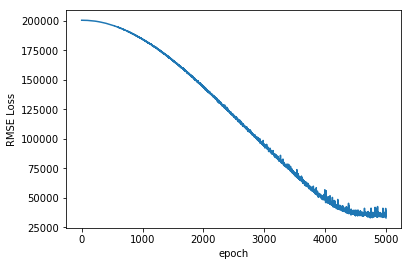

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(range(epochs), final_losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch')

In [75]:
#### Validate the Test Data
y_pred=""
with torch.no_grad():
    y_pred=model(test_categorical,test_cont)
    loss=torch.sqrt(loss_function(y_pred,y_test))
print('RMSE: {}'.format(loss))

RMSE: 41526.52734375


In [76]:
data_verify=pd.DataFrame(y_test.tolist(),columns=["Test"])

In [77]:
data_predicted=pd.DataFrame(y_pred.tolist(),columns=["Prediction"])

In [78]:
data_predicted

,Prediction
0,166954.140625
1,208494.296875
2,150019.156250
3,207114.171875
4,206389.640625
5,213100.171875
6,153655.234375
7,301815.156250
8,159493.156250
9,383977.562500


In [79]:
final_output=pd.concat([data_verify,data_predicted],axis=1)
final_output['Difference']=final_output['Test']-final_output['Prediction']
final_output.head()

,Test,Prediction,Difference
0,130000.0,166954.140625,-36954.140625
1,138887.0,208494.296875,-69607.296875
2,175500.0,150019.156250,25480.843750
3,195000.0,207114.171875,-12114.171875
4,142500.0,206389.640625,-63889.640625


In [80]:

#### Saving The Model
#### Save the model
torch.save(model,'HousePrice.pt')

C:\Users\Uttam\anaconda3\envs\envpytorch\lib\site-packages\torch\serialization.py:402: UserWarning: Couldn't retrieve source code for container of type FeedForwardNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [81]:
torch.save(model.state_dict(),'HouseWeights.pt')

In [82]:
### Loading the saved Model
embs_size=[(15, 8), (5, 3), (2, 1), (4, 2)]
model1=FeedForwardNN(embs_size,5,1,[100,50],p=0.4)

In [83]:
model1.load_state_dict(torch.load('HouseWeights.pt'))

<All keys matched successfully>

In [84]:
model1.eval()

FeedForwardNN(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)